In [1]:
import pandas as pd

data = pd.read_csv("Data/John Hopkins Covid-19 Case Tracker/2_cases_and_deaths_by_county_timeseries.csv")



In [2]:
print("Dataset shape:", data.shape)
print("First few rows:")
print(data.head())


Dataset shape: (1180944, 17)
First few rows:
        uid location_type  fips_code location_name        state        date  \
0  63072001        county    72001.0      Adjuntas  Puerto Rico  2020-01-22   
1  63072001        county    72001.0      Adjuntas  Puerto Rico  2020-01-23   
2  63072001        county    72001.0      Adjuntas  Puerto Rico  2020-01-24   
3  63072001        county    72001.0      Adjuntas  Puerto Rico  2020-01-25   
4  63072001        county    72001.0      Adjuntas  Puerto Rico  2020-01-26   

   total_population  cumulative_cases  cumulative_cases_per_100_000  \
0           18181.0                 0                           0.0   
1           18181.0                 0                           0.0   
2           18181.0                 0                           0.0   
3           18181.0                 0                           0.0   
4           18181.0                 0                           0.0   

   cumulative_deaths  cumulative_deaths_per_100_000  

In [3]:
# Handling missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
uid                                  0
location_type                        0
fips_code                         3540
location_name                      708
state                                0
date                                 0
total_population                 41064
cumulative_cases                     0
cumulative_cases_per_100_000     41064
cumulative_deaths                    0
cumulative_deaths_per_100_000    41064
new_cases                         3336
new_deaths                        3336
new_cases_per_100_000            44284
new_deaths_per_100_000           44284
new_cases_7_day_rolling_avg      20253
new_deaths_7_day_rolling_avg     17378
dtype: int64


In [5]:
from hmmlearn import hmm


In [17]:
selected_features = data[['cumulative_cases', 'cumulative_cases_per_100_000']].copy()


In [19]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
selected_features.dropna(inplace=True)
model.fit(selected_features)

# Compute log-likelihood of the trained model on the training data
log_likelihood = model.score(selected_features)

print("Log-Likelihood:", log_likelihood)


Log-Likelihood: -16816113.25660668


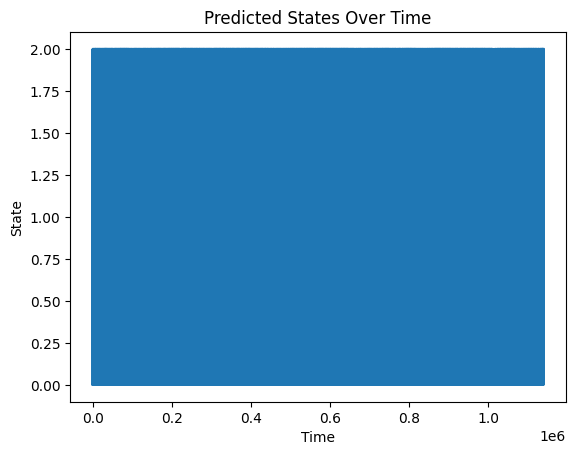

In [23]:
import matplotlib.pyplot as plt

# Generate predictions for future spread rates
predicted_states = model.predict(selected_features)

# Visualize predicted states
plt.plot(predicted_states)
plt.title("Predicted States Over Time")
plt.xlabel("Time")
plt.ylabel("State")
plt.show()



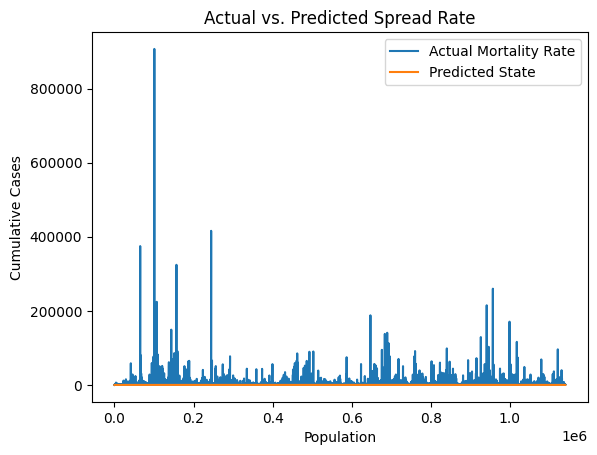

In [24]:
# Plot predicted spread rates against actual data
plt.plot(selected_features.index, selected_features['cumulative_cases'], label='Actual Mortality Rate')
plt.plot(selected_features.index, predicted_states, label='Predicted State')
plt.title("Actual vs. Predicted Spread Rate")
plt.xlabel("Population")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.show()
